<a href="https://www.kaggle.com/code/bencaiello/cve-dataset?scriptVersionId=140899759" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cve-common-vulnerabilities-and-exposures/products.csv
/kaggle/input/cve-common-vulnerabilities-and-exposures/vendors.csv
/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv
/kaggle/input/cve-common-vulnerabilities-and-exposures/vendor_product.csv


# Access Files and look at their Heads

In [4]:
#access files
file1 = pd.read_csv('/kaggle/input/cve-common-vulnerabilities-and-exposures/products.csv')
file2 = pd.read_csv('/kaggle/input/cve-common-vulnerabilities-and-exposures/vendors.csv')
file3 = pd.read_csv('/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv')
file4 = pd.read_csv('/kaggle/input/cve-common-vulnerabilities-and-exposures/vendor_product.csv')

#see what's inside
print('product: \n', file1.head(), len(file1))
print('\nvendors: \n', file2.head(), len(file2))
print('\ncve: \n',file3.head(), len(file3))
print('\nvendor_product: \n', file4.head(), len(file4))

product: 
            cve_id     vulnerable_product
0  CVE-2019-16548  google_compute_engine
1  CVE-2019-16547  google_compute_engine
2  CVE-2019-16546  google_compute_engine
3   CVE-2013-2092               dolibarr
4   CVE-2013-2091               dolibarr 180585

vendors: 
        Unnamed: 0    vendor
0  CVE-2019-16548   jenkins
1  CVE-2019-16547   jenkins
2  CVE-2019-16546   jenkins
3   CVE-2013-2092  dolibarr
4   CVE-2013-2091  dolibarr 101658

cve: 
        Unnamed: 0             mod_date             pub_date  cvss  cwe_code  \
0  CVE-2019-16548  2019-11-21 15:15:00  2019-11-21 15:15:00   6.8       352   
1  CVE-2019-16547  2019-11-21 15:15:00  2019-11-21 15:15:00   4.0       732   
2  CVE-2019-16546  2019-11-21 15:15:00  2019-11-21 15:15:00   4.3       639   
3   CVE-2013-2092  2019-11-20 21:22:00  2019-11-20 21:15:00   4.3        79   
4   CVE-2013-2091  2019-11-20 20:15:00  2019-11-20 20:15:00   7.5        89   

                                            cwe_name  \
0         

# Look at info / nulls in each column

In [5]:
print('file1: \n',file1.info()) #some NaN's in vulnerable_product column -- some cv_ids not associated with any product
print('file2: \n',file2.info()) #some NaN's in vendor column -- some cv_ids not associated with any vendor (same # as missing for product)
print('file3: \n',file3.info()) # ~half of the columns are complete, ~1/2 are missing a small number of values [same # of values in each column]
print('file4: \n',file4.info()) #no null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180585 entries, 0 to 180584
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   cve_id              180585 non-null  object
 1   vulnerable_product  180543 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB
file1: 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101658 entries, 0 to 101657
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  101658 non-null  object
 1   vendor      101616 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB
file2: 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89660 entries, 0 to 89659
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              89660 non-null  object 
 1   mod_date                89660 non-null 

# Look at / Confirm the relationships between the files

In [6]:
#Main file about the cves of use seems to be file3:
    # file1 supplies connection between cve_id and product
    # file 2 supplies connection between cve_id and vendor
    # file 4 supplies conncetion between vendor and product
    
#Look at duplicate values:
lendupfile1 = len(file1[file1['cve_id'].duplicated()==True])
print(lendupfile1, '  ' , len(file1) - lendupfile1)
print('Number of identical, unique cve values shared in file1,file2 and file3 [all = 89660, the length of file3]')

#slightly more than half of the cve_ids are duplicated, indicating vulnerabilities that affect more than one product.
print(sum(file1['cve_id'].unique() == file3['Unnamed: 0'].unique()))

#perfect correspondance between unique cve_id's in file1 and cve_ids in file2 and file3

print(sum(file3['Unnamed: 0'].unique() == file2['Unnamed: 0'].unique()))

# but obviously the cve_id corresponds to more than one vendor / product for many of the cve_ids
print('count of vendor unique values in file 2 and 4')
print(len(file2['vendor'].unique()))
print(len(file4['vendor'].unique()))

print('count of product unique values in file 1 and 4')
print(len(file1['vulnerable_product'].unique()))
print(len(file4['product'].unique()))

#now I will drop nulls in file3 as for each column they are in they are <5% of the values in those columns
file3 = file3.dropna()

90925    89660
Number of identical, unique cve values shared in file1,file2 and file3 [all = 89660, the length of file3]
89660
89660
count of vendor unique values in file 2 and 4
16176
16175
count of product unique values in file 1 and 4
40554
40553


# Merge files into 1 file
May work with original file (file3, or a a merge of file 2/3) just to use less computation per calculation. But if things aren't slowed down too much, I won't bother.

In [7]:
file3 = file3.rename(columns={'Unnamed: 0':'cve_id'})
file2 = file2.rename(columns={'Unnamed: 0':'cve_id'})

#if we want to merge everything (file 4 is dispensable, I think) 
file13 = file1.merge(file3)
file123 = file13.merge(file2)

file123.info()
file123.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242004 entries, 0 to 242003
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cve_id                  242004 non-null  object 
 1   vulnerable_product      241979 non-null  object 
 2   mod_date                242004 non-null  object 
 3   pub_date                242004 non-null  object 
 4   cvss                    242004 non-null  float64
 5   cwe_code                242004 non-null  int64  
 6   cwe_name                242004 non-null  object 
 7   summary                 242004 non-null  object 
 8   access_authentication   242004 non-null  object 
 9   access_complexity       242004 non-null  object 
 10  access_vector           242004 non-null  object 
 11  impact_availability     242004 non-null  object 
 12  impact_confidentiality  242004 non-null  object 
 13  impact_integrity        242004 non-null  object 
 14  vendor              

,cve_id,vulnerable_product,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,vendor
0,CVE-2019-2211,android,2019-11-14 21:36:00,2019-11-13 18:15:00,7.8,89,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,google
1,CVE-2019-2212,android,2019-11-14 21:30:00,2019-11-13 18:15:00,4.9,200,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,google
2,CVE-2019-2213,android,2019-11-14 21:24:00,2019-11-13 18:15:00,6.9,416,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,google
3,CVE-2019-2214,android,2019-11-14 21:19:00,2019-11-13 18:15:00,7.2,269,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,google
4,CVE-2019-18793,parallels_plesk_panel,2019-11-14 21:14:00,2019-11-13 20:15:00,4.3,79,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,parallels


# Time to deal with nulls & duplicate / unneeded values

In [8]:
sum(file123.duplicated()) # equals zero, so no duplicates. To see, wrap in a print statement or run on its own by ctrl-shift-enter in the notebook

#Convert date columsnt to datetime
file123['mod_date'] = pd.to_datetime(file123['mod_date'])
file123['pub_date'] = pd.to_datetime(file123['pub_date'])

#just make the mod date a function of the publication date
file123['mod_date'] = file123['mod_date'] - file123['pub_date'] 

#only remaining nulls (after dropping the null columns in file 3 earlier) are in the vendor/product columns that would represent cve's without a value in that column
#if the product is missing, it can't be filled easily, but if the vendor is missing, it may be inferrable from the product
#the description may also provide info
#But first: take a look at the NaN rows--

#print(file123[file123['vulnerable_product'].isna()]) # uncomment to run

#all NaN products are also the NaN vendors
#let's look at summary
pd.options.display.max_colwidth=500
#print(file123[file123['vendor'].isna()]['summary'].head(n=1)) # uncomment to see output
#checked one of the summaries, the only indicative word of vendor or product was 'oVirt'
file123 = file123.dropna()
file123[file123['vulnerable_product'].str.contains('oVirt')]

#no oVirt in product list -- will simply drop NaNs, as has already been done and not try to salvage NaNs in vendor/product columns
print(file123.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241979 entries, 0 to 242003
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   cve_id                  241979 non-null  object         
 1   vulnerable_product      241979 non-null  object         
 2   mod_date                241979 non-null  timedelta64[ns]
 3   pub_date                241979 non-null  datetime64[ns] 
 4   cvss                    241979 non-null  float64        
 5   cwe_code                241979 non-null  int64          
 6   cwe_name                241979 non-null  object         
 7   summary                 241979 non-null  object         
 8   access_authentication   241979 non-null  object         
 9   access_complexity       241979 non-null  object         
 10  access_vector           241979 non-null  object         
 11  impact_availability     241979 non-null  object         
 12  impact_confident

# Visualization: CVSS scores -- overall distribution


Now that nulls are gone, and the data relatively clean, we can start to look at it

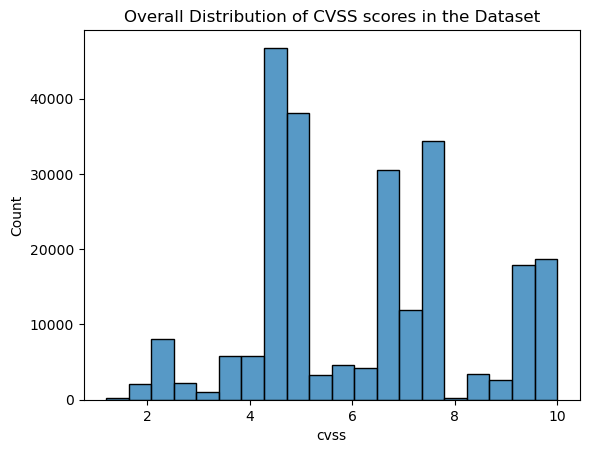

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#looking at what a cvss score is: https://nvd.nist.gov/vuln-metrics/cvss. As it is a numerical way of scoring the severity of a threat, this is likely our main target metric (for most plots)
#CVSS is also almost the only numerical column in the dataset, except perhaps the mod_date, now that that column is a change in time from publication date.
#The other columns are all categorical or descriptive. This means I likely will mainly be using categorical plots / grouped data methods for visualization.
sns.histplot(data = file123, x ='cvss',bins=20)
plt.title("Overall Distribution of CVSS scores in the Dataset")
plt.show()


# Visualizations (cont.): most affected vendors

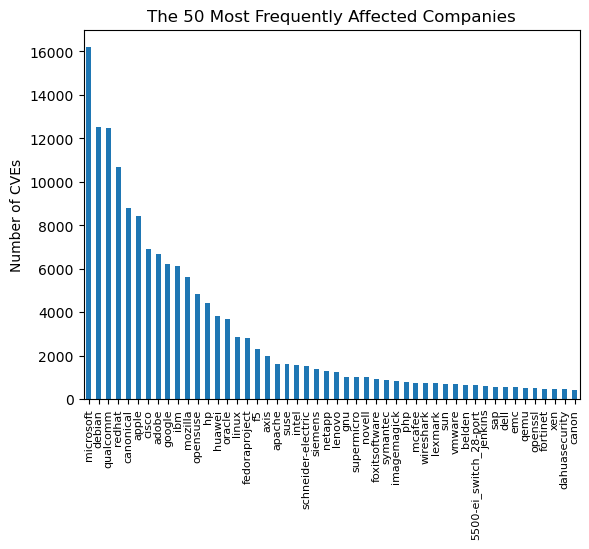

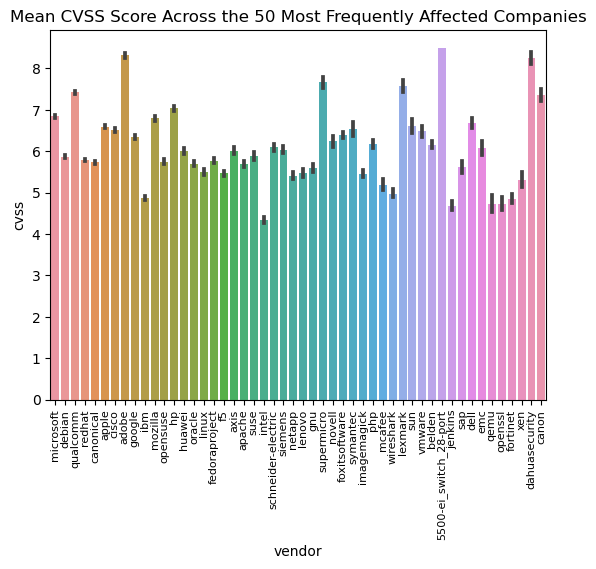

In [10]:
top_vend = file123['vendor'].value_counts().head(n=50)
top = list(top_vend.index)

top_vend.plot(kind='bar')
plt.title("The 50 Most Frequently Affected Companies")
plt.ylabel('Number of CVEs')
plt.xticks(rotation = 90,size=8)
plt.show()

file123_top = file123[file123['vendor'].isin(top)]
sns.barplot(x='vendor',y='cvss',data=file123_top,order=top)
plt.title("Mean CVSS Score Across the 50 Most Frequently Affected Companies")
plt.xticks(rotation = 90,size=8)
plt.show()

# Visualizations: Top Affected products

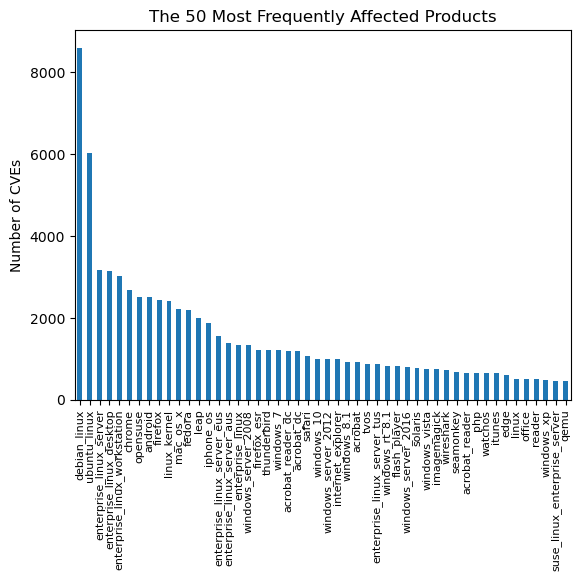

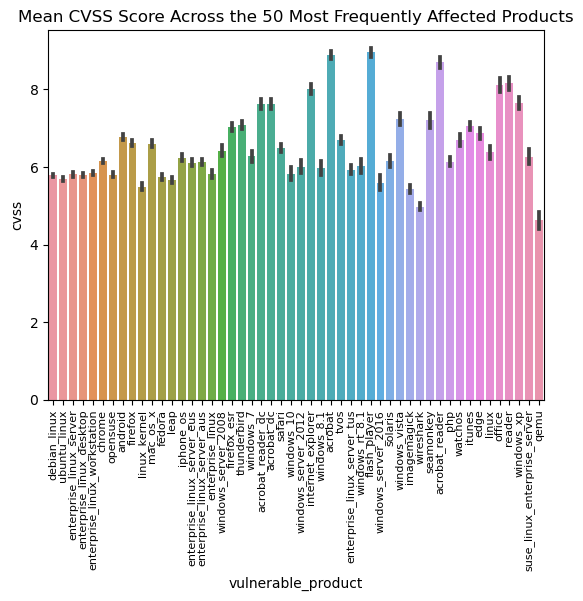

In [11]:
top_prod = file123['vulnerable_product'].value_counts().head(n=50)
top_p = list(top_prod.index)

top_prod.plot(kind='bar')
plt.title("The 50 Most Frequently Affected Products")
plt.ylabel('Number of CVEs')
plt.xticks(rotation = 90,size=8)
plt.show()

file123_top_p = file123[file123['vulnerable_product'].isin(top_p)]
sns.barplot(x='vulnerable_product',y='cvss',data=file123_top_p,order=top_p)
plt.title("Mean CVSS Score Across the 50 Most Frequently Affected Products")
plt.xticks(rotation = 90,size=8)
plt.show()

# Visualization: Operating systems

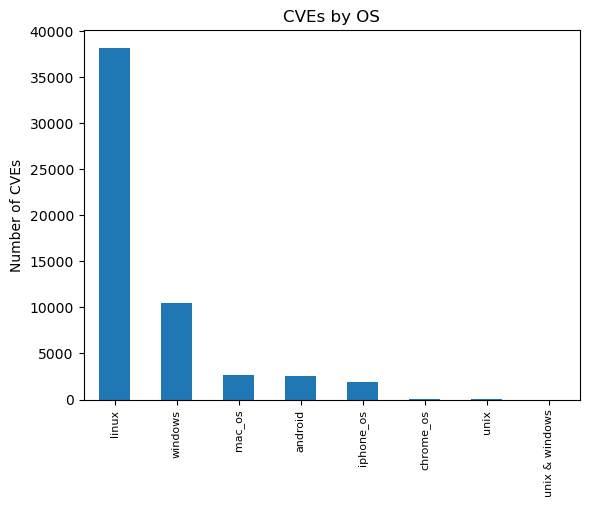

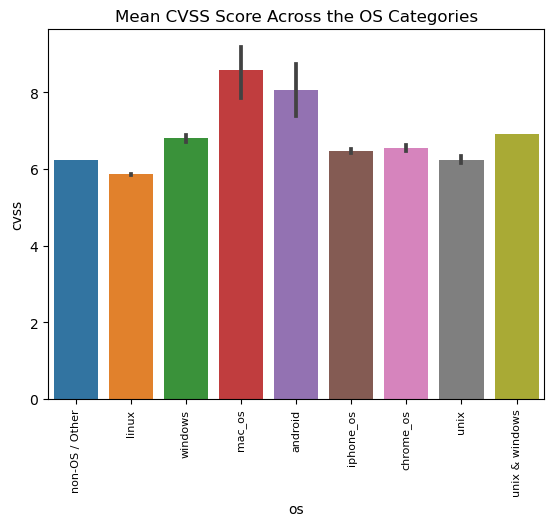

In [19]:
#In the product bar-charts above we can see a lot of "linux" or "windows" in the names
#let's see if we can extra information about the OS from the product name

file123['is_linux'] = np.where(file123['vulnerable_product'].str.lower().str.contains('linux'),1,0)
file123['is_android'] = np.where(file123['vulnerable_product'].str.lower().str.contains('android'),2,0)
file123['is_unix'] = np.where(file123['vulnerable_product'].str.lower().str.contains('unix'),3,0)
file123['is_chrome'] = np.where(file123['vulnerable_product'].str.lower().str.contains('chrome_os'),4,0)
file123['is_windows'] = np.where(file123['vulnerable_product'].str.lower().str.contains('windows'),5,0)
file123['is_mac'] = np.where(file123['vulnerable_product'].str.lower().str.contains('mac_os'),6,0)
file123['is_iphone'] = np.where(file123['vulnerable_product'].str.lower().str.contains('iphone_os'),7,0)

file123['os'] = file123['is_iphone'] + file123['is_linux'] + file123['is_mac'] + file123['is_android'] + file123['is_chrome'] + file123['is_windows'] + file123['is_unix']

#take a look inside 'mac' (as I have a choice of searching for 'mac' or 'mac_os'): (uncomment to run)
#print(file123[file123['vulnerable_product'].str.lower().str.contains('mac')])
#Top result is 'maconomy', simple google search reveals this has nothing to do with mac_os.... so 'mac_os' it is!


#compare counts of individual columns vs. combined result: one windows + unix (value = 8) product
#note this is after re-ordering columns and refining str.contains('statements'). 
#Of note, I added "_os" to the chrome search, which greatly reduced the number of hits for chrome (presumably excluding the browser)
#Importantly, this also reduced the number of overlapped values to 2 (using 'mac_os' instead of 'mac' reduces this to 1). 
'''#Uncomment code block to see test/comparison of the individual columns to the singular os column:
print(0)
print(sum(file123['is_linux']))
print(sum(file123['is_android'] / 2))
print(sum(file123['is_unix'] / 3))
print(sum(file123['is_chrome'] / 4))
print(sum(file123['is_windows'] / 5))
print(sum(file123['is_mac'] / 6))
print(sum(file123['is_iphone'] / 7))

print(file123['os'].value_counts().sort_index())
'''
#Now, let's plot:

labels_by_order=['linux','windows','mac_os','android','iphone_os','chrome_os','unix','unix & windows']
labels_by_order_with_non_os = ['non-OS / Other','linux','windows','mac_os','android','iphone_os','chrome_os','unix','unix & windows']
OS_count = file123['os'].value_counts()[1:]

OS_count.plot(kind='bar')
plt.title("CVEs by OS")
plt.ylabel('Number of CVEs')
plt.xticks(rotation = 90,size=8,ticks=[0,1,2,3,4,5,6,7],labels = labels_by_order)
plt.show()

sns.barplot(x='os',y='cvss',data=file123)
plt.title("Mean CVSS Score Across the OS Categories")
plt.xticks(rotation = 90,size=8,ticks=[0,1,2,3,4,5,6,7,8],labels = labels_by_order_with_non_os)
plt.show()

Perhaps this might have to do with the open-source nature of linux making its CVE's more frequently/easily reported? Linux has dramatically more CVE's in this dataset but the mean CVSS score is noticeably lower than the other common OS's.



Caveats: not all OS's are captured in this graph, and it is likely that my search terms may have excluded some as well (for example, 'mac_os' as a search term might miss some mac operating systems. It reduced the number of cve's in that search by ~1200 events, compared to only searching for 'mac'. However, I chose the more exclusive term to remove programs, like 'maconomy' that might show up in my results with a less stringent search)